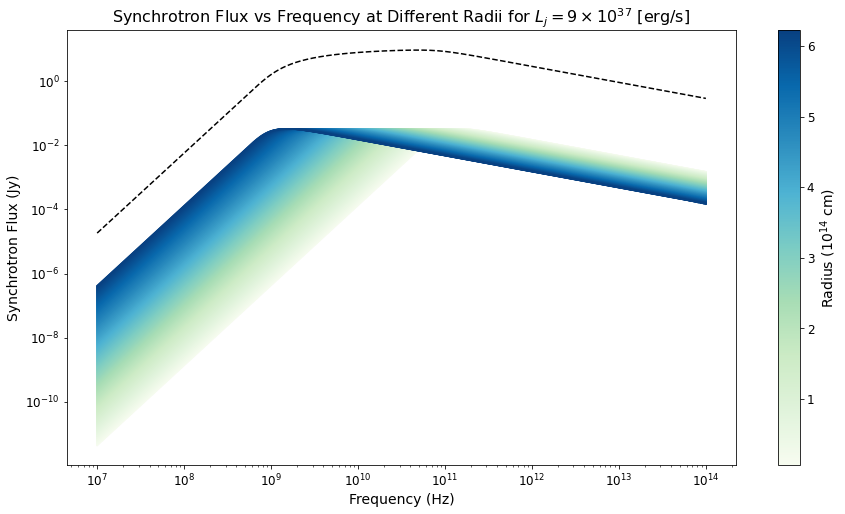

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
import math
from scipy.special import gamma
from matplotlib import cm

# Constants in cgs units
c = 3e10  # Speed of light (cm/s)
m_e = 1e-27  # Electron mass (g)
e = 4.803e-10  # Elementary charge (esu)
M_sun = 2e33  # Sun's mass (g)
G = 7e-8  #Gravitational constant (erg cm / g^2)

M = 4e6 * M_sun  # Sgr A*'s mass
L_j = 9e37  # Accretion power (erg/s)
r_g = G * M / c**2  #Gravitational radius
r_i = 10 * r_g  # Initial radius (cm)
r_f = 1000 * r_g  # Final radius (cm)
theta = math.radians(10)  #opening angle of 10 degrees converted to radiants 
v = 0.3 * c  # Bulk velocity (cm/s)
d = 2.5e22 # Distance from Sgr A* (cm)

eta_values = np.linspace(0.1, 1.5, 5)
r_values = np.logspace(np.log10(r_i), np.log10(r_f), 500)
nu_values = np.logspace(7, 14, 500)
dr_values = np.ediff1d(r_values)

# Function to calculate B(t) Note: This function also depends on p, here p=2
def B(r):
    return np.sqrt(4 * L_j / v) * 1/r

# Function to calculate C(t) Note: This function also depends on p, here p=2
def C(r):
    return (B(r))**2 / (24 * np.log(10) * np.pi)
    
# Function to calculate alpha_nu
def alpha_nu(r, nu, p):
    return np.sqrt(3) * e**3 / (8 * np.pi * m_e) * (3 * e / (2 * np.pi * m_e**3 * c**5))**(p/2) * C(r) *  (B(r)/2)**((p+2)/2) * gamma((3*p + 2)/12) * gamma((3*p + 22)/12) * nu**((-p-4)/2)

#Function to calculate tau
def tau(r, nu, p):
    return alpha_nu(r, nu, p)*r

#Function to calculate power P_syn
def P_syn(r, nu, p):
    return np.sqrt(3) * e**3 * C(r) / (m_e * c**2) * B(r) / (2 * m_e * c**2 * (p+1)) * gamma(p/4 + 19/12) * gamma(p/4 - 1/12) * (4 * np.pi * m_e * c * nu/(3 * e * B(r)))**((1-p)/2)

# Function to calculate the source function S_syn
def S_syn(r, nu, p):
    return P_syn(r, nu, p)/(4 * np.pi * alpha_nu(r, nu, p))
    
# Function to calculate the intensity I_syn(nu, t)
def I_syn(r, nu, p):
    return S_syn(r, nu, p) * (1 - np.exp(-tau(r, nu, p)))

#Define a function to calculate the synchrotron flux F
def F_syn(r, nu, p, dr):
    return  I_syn(r, nu, p) * r * dr / (np.tan(theta/2) * 4 * d**2)

# Create a colormap
cmap = cm.GnBu

total_flux = np.zeros(len(nu_values))
# Plot the results for different radii in r_values

plt.figure(figsize=(15, 8))
for i, (r, dr) in enumerate(zip(r_values, np.ediff1d(r_values))):
    flux_values = [1e23 * F_syn(r, nu, 2, dr) for nu in nu_values]
    total_flux += flux_values
    color = cmap(float(i) / len(r_values))  # Map r values to colors in the colormap
    plt.plot(nu_values, flux_values, color=color)

# Add a colorbar
norm = plt.Normalize(min(r_values)*1e-14, max(r_values)*1e-14)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, label=r'Radius ($10^{14}$ cm)')
cbar.set_label(r'Radius ($10^{14}$ cm)', fontsize=14)
cbar.ax.tick_params(labelsize=12)

plt.plot(nu_values, total_flux, color='black', linestyle='--', label='Total Flux')
# Customize the plot
plt.xlabel('Frequency (Hz)', size = 14)
plt.ylabel('Synchrotron Flux (Jy)', size = 14)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(r'Synchrotron Flux vs Frequency at Different Radii for $L_j=9\times 10^{37} $ [erg/s]', size = 16)
plt.show()

C:\Users\30697\AppData\Local\Temp/ipykernel_22308/4053772591.py:26: RuntimeWarning: divide by zero encountered in log10
  contour = plt.contourf(T, Nu, np.log10(I_values), cmap=cm.plasma, levels=100)


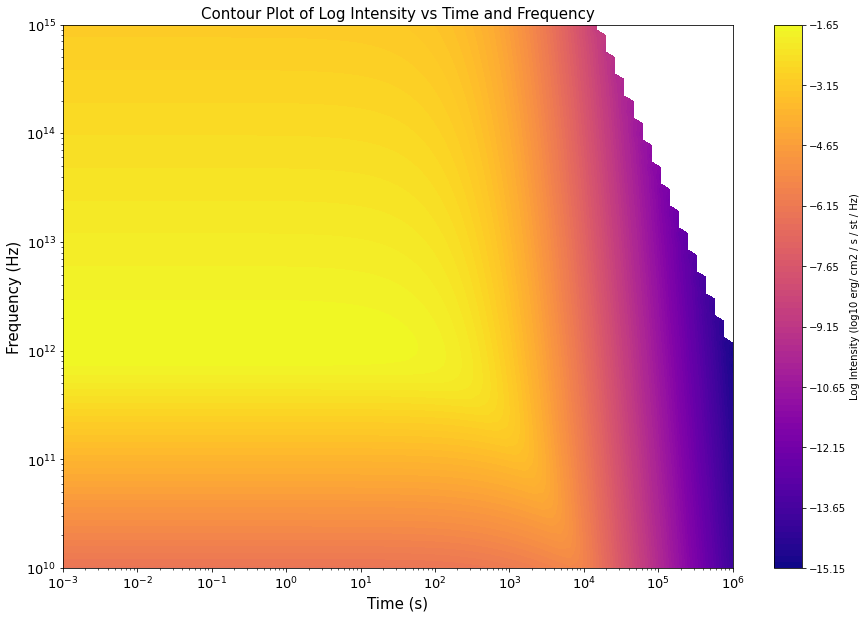

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from matplotlib import cm

# Constants and functions as defined in your code...

# Define time and frequency values
time_values = np.geomspace(1e-3, 1e6, 75)
frequency_values = np.geomspace(1e10, 1e15, 100)

# Create a meshgrid for time and frequency
T, Nu = np.meshgrid(time_values, frequency_values)

# Initialize a 2D array for intensity values
I_values = np.zeros_like(T)

# Calculate intensity for each combination of time and frequency
for i in range(len(time_values)):
    for j in range(len(frequency_values)):
        nu = frequency_values[j] * 1
        I_values[j, i] = I_syn(nu, R(time_values[i]), p=2)

# Create a contour plot with log scale for intensity
plt.figure(figsize=(15, 10))
contour = plt.contourf(T, Nu, np.log10(I_values), cmap=cm.plasma, levels=100)
plt.colorbar(contour, label='Log Intensity (log10 erg/ cm2 / s / st / Hz)')

plt.xlabel('Time (s)', size=15)
plt.ylabel('Frequency (Hz)', size=15)
plt.xscale('log')
plt.yscale('log')
plt.xticks(size=13)
plt.yticks(size=13)
plt.title('Contour Plot of Log Intensity vs Time and Frequency', size=15)
plt.show()


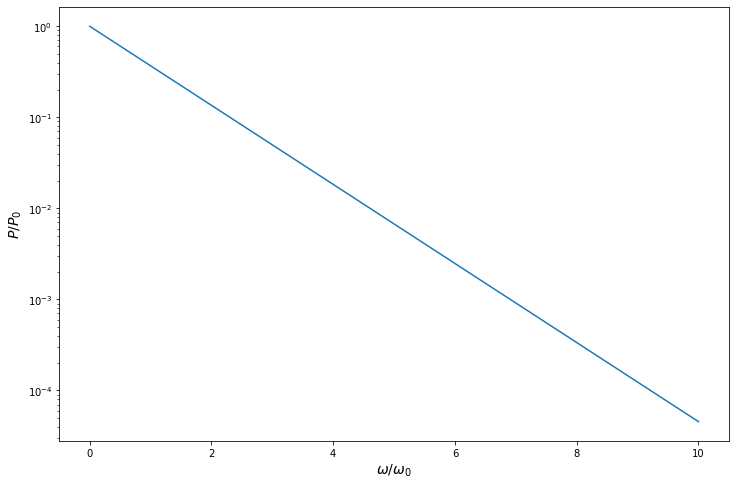

In [152]:
def dW_domega_over_P0(Omega):
    return np.exp(-Omega)

Omega_values = np.geomspace(1e-5, 1e1, 100)
plt.figure(figsize=(12, 8))
plt.semilogy(Omega_values, dW_domega_over_P0(Omega_values))
plt.xlabel(r'$\omega/\omega_0$', size = 14)
plt.ylabel(r'$P/P_0$', size = 14)
plt.show()